## 下載模組

在終端機輸入以下指令：

```
pip install selenium
```

## 匯入模組

In [6]:
import base64
import os

# 函式註解
from typing import *

# 網路爬蟲
from time import sleep
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.remote.webelement import WebElement
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.action_chains import ActionChains

## 執行網路爬蟲

**<font color="lightblue">執行之後甚麼都不要碰，網頁自動關閉後 "pictures" 資料夾會多出新圖片</font>**

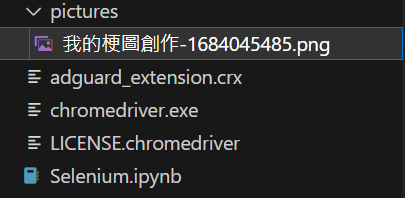

注意事項：
- 點擊 "上下留白" 按鈕，可能會報錯，原因尚不明 (概率約 5% 左右)，若碰上再執行一次即可
- 盡量不要用 By.XPATH 去找網頁元素，因為每次進入都可能會不同
- 每張梗圖 textarea 數量、位置可能不同，所以之後需要調整
- 無頭模式 (headless) 程式碼會失效

In [7]:
# 文本
title_text = "推薦新手學習的程式語言"
text_1 = "C++"
text_2 = "Python"

# 網址
url = "https://memes.tw/maker/painter/21673"

###########

# 安裝檔廣告插件 adguard
chrome_options = Options()
chrome_options.add_extension("./adguard_extension.crx")
chrome_options.add_argument("--disable-gpu")  # 關閉 GPU

# 設定下載路徑
current_directory = os.getcwd()
download_path = os.path.join(current_directory, r"pictures")

chrome_options.add_experimental_option("prefs", {
    "download.default_directory": download_path
})

###########

# 初始化瀏覽器、設置智能等待
# 注意!!! implicitly_wait 不要設定得太短
driver = webdriver.Chrome('chromedriver', options = chrome_options)
driver.implicitly_wait(60)

# 開啟瀏覽器，並固定視窗大小
driver.get(url)
driver.set_window_size(1920, 1080)

# 切換回第一個分頁 (因為安裝 adguard 時會切分頁)
driver.switch_to.window(driver.window_handles[0])

###########

# 關閉小視窗
sleep(0.5)
btn = driver.find_element(By.CSS_SELECTOR, "#cta-login-modal > div > div > div.modal-header > button > span")
btn.click()

# 點擊 "上下留白" 按鈕
sleep(1.5)
btn_cover = driver.find_element(By.CSS_SELECTOR, "#image-container > div.inputs > div:nth-child(2) > div > div > div:nth-child(1) > div > button")
btn_cover.click()

# 點擊 "白色背景"
btn_white_bg = driver.find_element(By.CSS_SELECTOR, "#image-container > div.inputs > div:nth-child(2) > div > div > div.mx-n1.mt-n1 > div:nth-child(1) > div:nth-child(3) > div > div")
btn_white_bg.click()

# 選擇 "位置" 在 "上方"
# none, both, top, bottom
select_loc = Select(driver.find_element(By.CSS_SELECTOR, "#image-container > div.inputs > div:nth-child(2) > div > div > div.mb-2 > select.form-control.form-control-sm.d-inline-block.mr-3"))
select_loc.select_by_value("top")

###########

# 新增文字區塊
btn_add_text = driver.find_element(By.CSS_SELECTOR, "#image-container > div.inputs > div.row.no-gutters > div > button")
btn_add_text.click()

# 在文字區塊中輸入文字
sleep(0.5)
title = driver.find_element(By.CSS_SELECTOR, "#image-container > div.inputs > div:nth-child(5) > div:nth-child(3) > textarea")
textarea_1 = driver.find_element(By.CSS_SELECTOR, "#image-container > div.inputs > div:nth-child(5) > div:nth-child(1) > textarea")
textarea_2 = driver.find_element(By.CSS_SELECTOR, "#image-container > div.inputs > div:nth-child(5) > div:nth-child(2) > textarea")

title.clear()
title.send_keys(title_text)

textarea_1.clear()
textarea_1.send_keys(text_1)

textarea_2.clear()
textarea_2.send_keys(text_2)

###########

# 拖曳文字區塊的自定義函式
def actions_increment(actions: ActionChains, element: WebElement,
                      offset: Tuple[float], 
                      ratio_start: Tuple[float], 
                      ratio_end: Tuple[float]) -> None:
    # 移動到文字區塊上並進行拖曳
    # move_to_element_with_offset(ele, offset_x, , offset_y)
    # 移動到 ele 上的 offset 座標，(0, 0) 代表在正中央
    actions.move_to_element_with_offset(element, offset[0] * ratio_start[0], offset[1] * ratio_start[1]).click_and_hold()
    
    # 拖曳到指定位置後放開
    actions.move_to_element_with_offset(element, offset[0] * ratio_end[0], offset[1] * ratio_end[1]).release()
    
    return None

sleep(0.5)
canvas_meme = driver.find_element(By.CSS_SELECTOR, "#image-container > div.canvas-box > div.canvas-container > canvas.upper-canvas.border")

# 將整個梗圖顯示在畫面上
driver.execute_script("arguments[0].scrollIntoView();", canvas_meme)  

# 因為 (0, 0) 在正中央，所以整體大小除以 2 為右下方的座標
# 可以將整個圖切割成數個 grids，搭配小數運算來操作拖曳
canvas_x = canvas_meme.size['width'] / 2
canvas_y = canvas_meme.size['height'] / 2

# 設定滑鼠行為，並進行拖曳
actions = ActionChains(driver)
actions_increment(actions, canvas_meme, (canvas_x, canvas_y), (0.1, 0.1), (0.1, 0.6))  # 後面 4 個小數來就是用來操作座標的
actions_increment(actions, canvas_meme, (canvas_x, canvas_y), (0.1, -1*(0.6)), (0.1, -1*(0.2)))
actions.perform()

###########

# 下載圖片
sleep(0.5)
btn_gen = driver.find_element(By.CSS_SELECTOR, "#btn-generate")
btn_gen.click()

btn_download = driver.find_element(By.CSS_SELECTOR, "#rescueModal > div > div > div.modal-body > button")
btn_download.click()


# 理論上要用以下程式碼，但因為網頁問題而無法使用
# meme_pic = driver.find_element(By.CSS_SELECTOR, "#image-container > div.canvas-box > div.canvas-container > canvas.upper-canvas.border")
# canvas_base64 = driver.execute_script("return arguments[0].toDataURL('image/png').substring(21);", meme_pic)
# canvas_png = base64.b64decode(canvas_base64)

# with open('Meme.PNG', 'wb') as file:
#     file.write(canvas_png)

###########

# 關閉瀏覽器
sleep(3)
driver.quit()

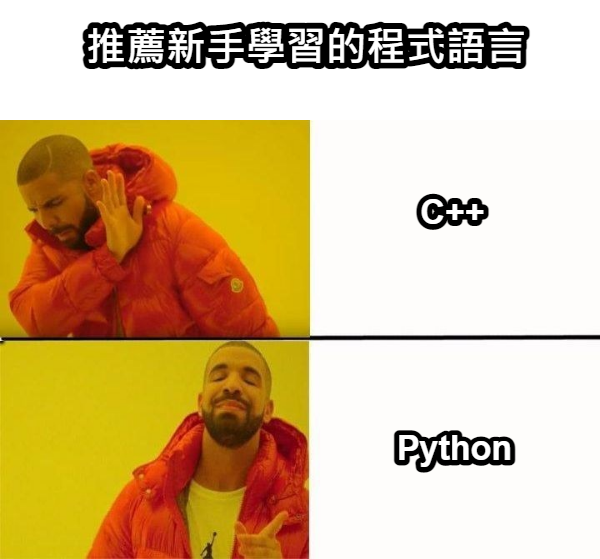